<a href="https://colab.research.google.com/github/fay421/ML_LinearRegression/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logestic Regression Project-Titanic

### About Dataset
Titanic is a very famous data set!
####https://www.kaggle.com/c/titanic


## Import Liberaries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data


In [57]:
df = pd.read_csv('titanic_train.csv')

## Exploratory Data Analysis:EDA


In [58]:
# show 5 top head of dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
#show dimention of dataset
df.shape

(891, 12)

### Dataset inclues 891 samples and 12 features

In [60]:
#show information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### There are Null values in 3 columns: Age,Cabin and Embarked


In [61]:
#show the number of Null values in each columns
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [62]:
#show duplicated values
df.duplicated().sum()

0

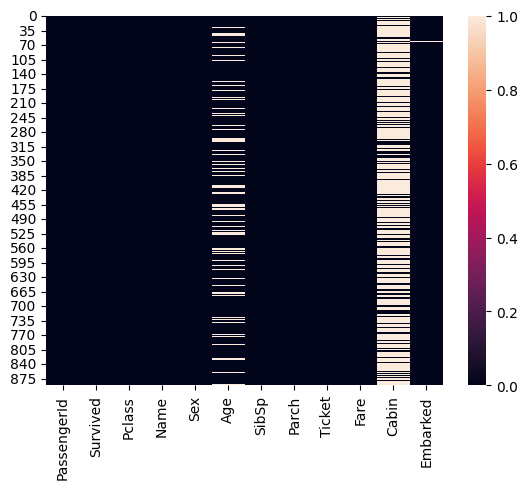

In [63]:
#show Null values
sns.heatmap(df.isna());

As shown roughly 20% of data in Age is missing and most part of the missing data is seen in Cabin.

In [64]:
#remove 2 columns
df = df.drop(['PassengerId','Ticket'] , axis = 1)

In [65]:
#show columns
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

## Visulization


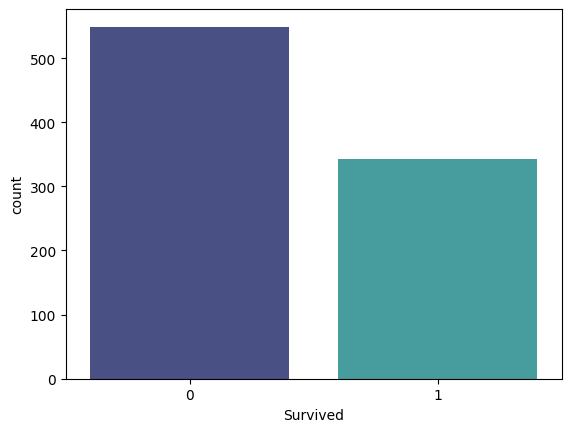

In [66]:
#show distribution of survived people
sns.countplot(data=df , x = 'Survived',palette='mako');

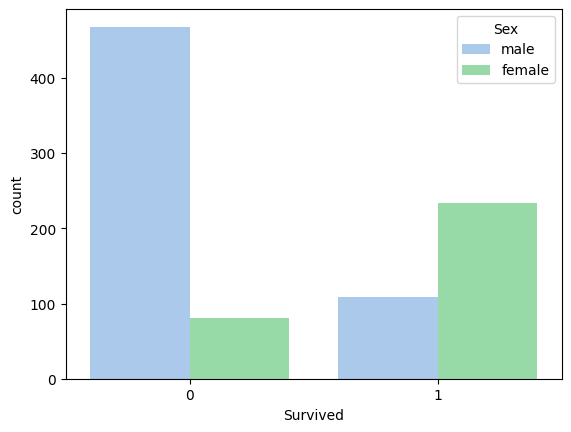

In [67]:
#show distribution of survival values based on gender
sns.countplot(data=df, x ='Survived',hue = 'Sex',palette='pastel6');

### As shown the number of unsurvived males is much more than survived males. But, survived females are more than double the unsurvived ones.


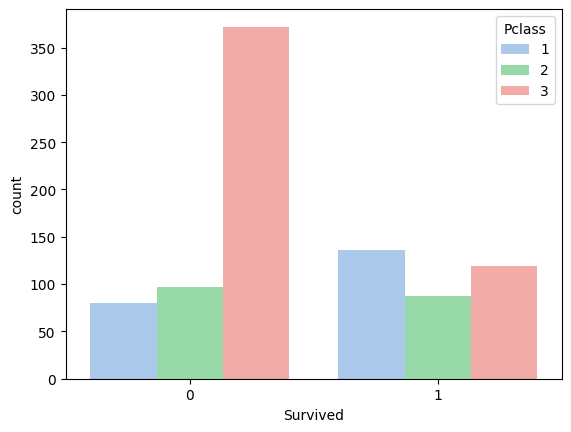

In [68]:
#show distribution of survival values based on pclass
sns.countplot(data=df, x ='Survived',hue = 'Pclass',palette='pastel6');

### A huge number of unsurvived people belonged to the 3rd class.


<ipython-input-69-43d189163a7a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna(), bins = 30 , kde= False)


<Axes: xlabel='Age'>

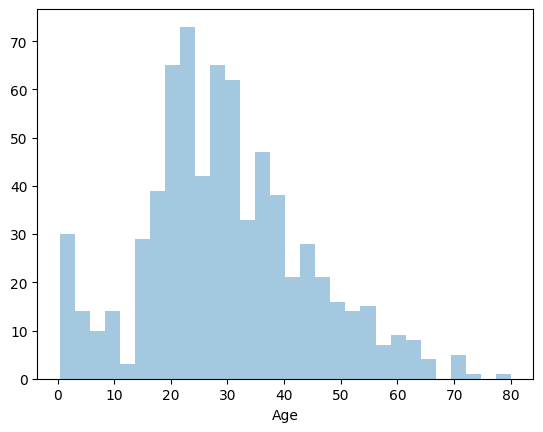

In [69]:
#show distribution of Age
sns.distplot(df['Age'].dropna(), bins = 30 , kde= False)

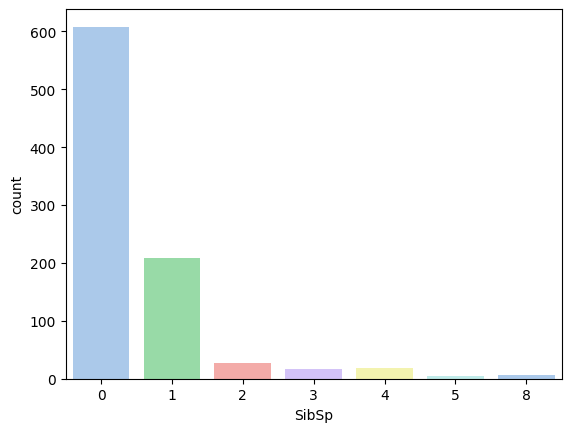

In [70]:
#show distribution of siblings and spouse
sns.countplot(data = df ,x = 'SibSp',palette='pastel6');

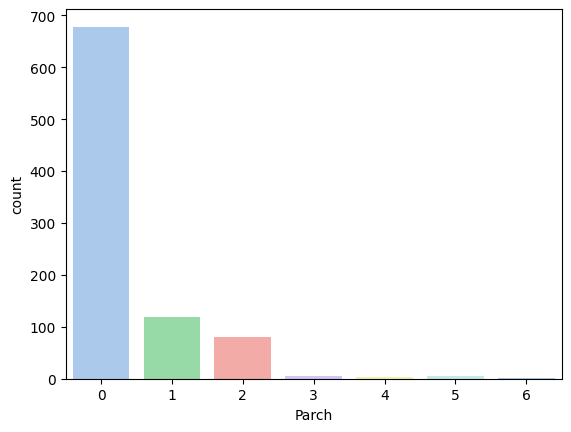

In [71]:
#show distribution of parent and children
sns.countplot(data=df , x = 'Parch',palette='pastel6');

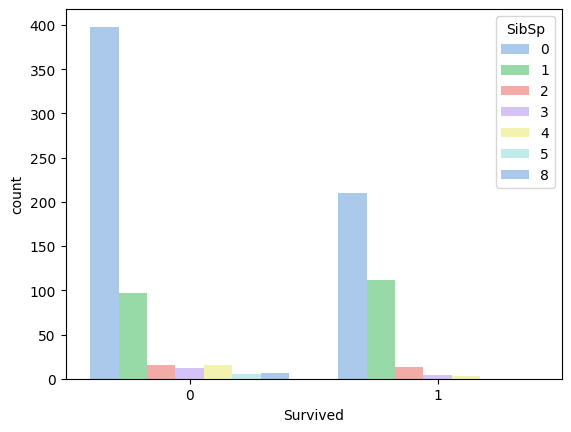

In [72]:
#show survival based on spouse and sibling number
sns.countplot(data=df , x = 'Survived' , hue = 'SibSp',palette='pastel6');

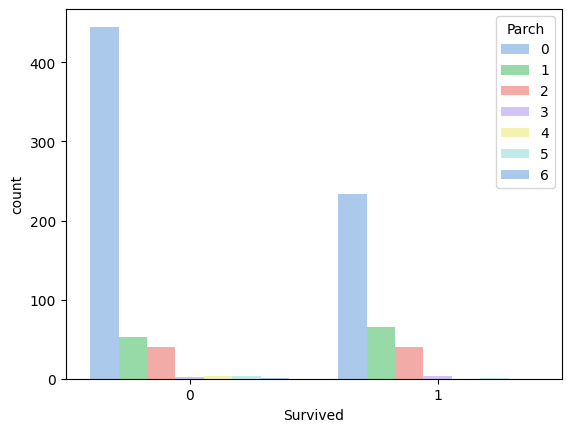

In [73]:
#show survival based on parent and child number
sns.countplot(data=df , x = 'Survived' , hue = 'Parch',palette='pastel6');

## Data Cleaning


### Fill in missing Age data by considering the average age in each passenger's class.

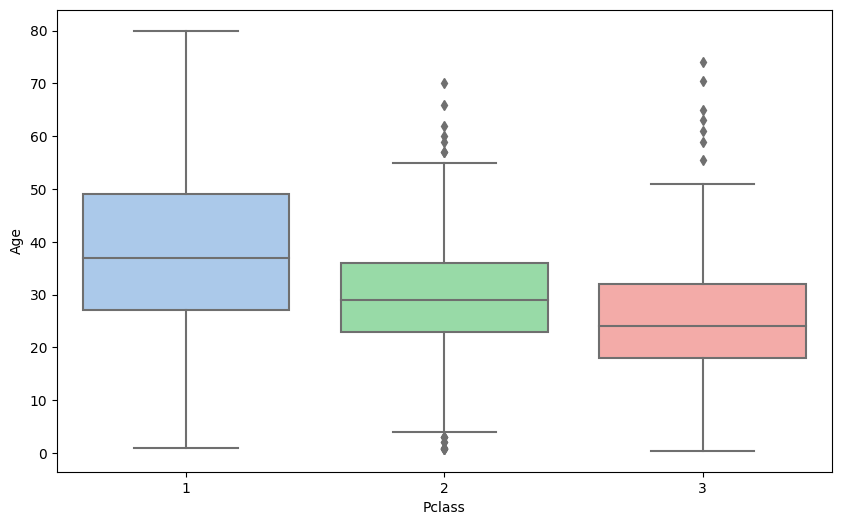

In [74]:
# check the outliers
plt.figure(figsize= (10, 6))
sns.boxplot(x = 'Pclass', y= 'Age' ,  data = df,palette='pastel6');

In [75]:
# check the average age in each class
class_means = df.groupby('Pclass')['Age'].mean()
print(class_means)

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


## Imputing missing data by defining a function

In [76]:
def impute_missing_data(cols):
  Age = cols[0]
  Pclass  = cols[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return 38
    elif Pclass == 2:
      return 29
    else:
      return 25
  else:
    return Age


In [77]:
# apply function on Age column
df['Age'] = df[['Age','Pclass']].apply(impute_missing_data, axis = 1)

In [78]:
# check dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


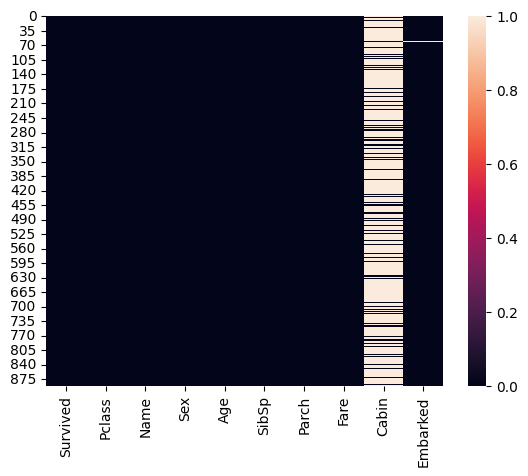

In [79]:
# check heatmap
sns.heatmap(df.isnull());

In [80]:
#remove cabin column
df=df.drop('Cabin', axis=1)

In [81]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [82]:
#check Embarked column
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## Imputing missing data (categorical)

In [83]:
# replace missing data with maximum Embarked ='S'
df['Embarked']=df['Embarked'].fillna('S')

In [84]:
#remove Name column
df=df.drop('Name', axis = 1)

## Converting categorical features

In [85]:
#Use getdummies in pandas package
df = pd.get_dummies(df,columns=['Sex' , 'Embarked','Pclass'],drop_first=True)

In [86]:
# check the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_male    891 non-null    uint8  
 6   Embarked_Q  891 non-null    uint8  
 7   Embarked_S  891 non-null    uint8  
 8   Pclass_2    891 non-null    uint8  
 9   Pclass_3    891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.3 KB


In [87]:
df.head(5)

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [88]:
df.shape

(891, 10)

## Tha dataframe is ready to use.

## Building Logestic Regression Model


### Train Test Split

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train , y_test  = train_test_split(df.drop('Survived',axis = 1),df['Survived'],test_size= 0.3 , random_state= 42)

### Scale Data

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler=StandardScaler()

In [93]:
X_train_scales = scaler.fit_transform(X_train)
X_test_scales = scaler.fit_transform(X_test)

### Training and Predicting

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
LR=LogisticRegression()

In [96]:
LR.fit(X_train_scales,y_train)

LogisticRegression()

In [97]:
pred=LR.predict(X_test_scales)

In [98]:
pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0])

## Evaluation

### Confusion Matrix

In [99]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [100]:
confusion_matrix(y_test,pred)

array([[140,  17],
       [ 33,  78]])

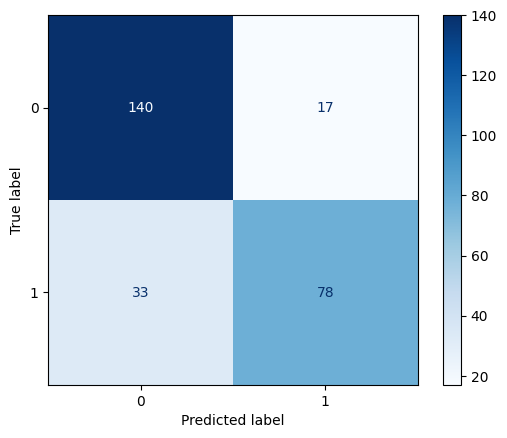

In [101]:
cm = confusion_matrix(y_test,pred)
report= classification_report(y_test,pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
cm_display.plot(cmap='Blues', values_format='d');

### Results:


*   True Positive (TP): 78 instances where the model correctly predicted the positive class.
*   True Negative (TN): 140 instances where the model correctly predicted the negative class.
*   False Positive (FP): 17 instances where the model incorrectly predicted the positive class (false alarm).
*   False Negative (FN): 33 instances where the model incorrectly predicted the negative class (miss).











## check precision,recall,f1-score using classification report

In [102]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       157
           1       0.82      0.70      0.76       111

    accuracy                           0.81       268
   macro avg       0.82      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



## Conclusion:
In summary, the model performs reasonably well, with good precision and recall for both classes. However, the specific expectations for model performance depend on the context of your problem and the trade-offs between precision and recall that are acceptable for your application.